In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=columns)
iris.to_csv('iris.csv', index=False)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [19]:
iris.describe(include='all').to_markdown('iris_description.md')

In [5]:
iris.shape

(150, 5)

In [6]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026



![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Figure 1 - Images of the three Iris species, annotated to demonstrate the difference between petal and sepal

_Retrieved from https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png_


There are 150 data points across 5 columns
4 of the columns are numeric and one is categorical
The 4 numeric columns are ....
sepal_length has a mean value of 5.84, and its values range from a minimum of 4.3 to a maximum of 7.9

petal_length has the largest spread in values, as its standard deviation is 1.76, whereas the other numeric columns have standard deviations less than 1 - we would expect to see a wider histogram for petal length than the other numeric features.

The observations are evenly distributed between the species, with 50 observations of each of iris setosa, versicolor, and virginica.

In [10]:
import pathlib
chart_folder = pathlib.Path('charts')
if not chart_folder.exists():
    chart_folder.mkdir()


In [20]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

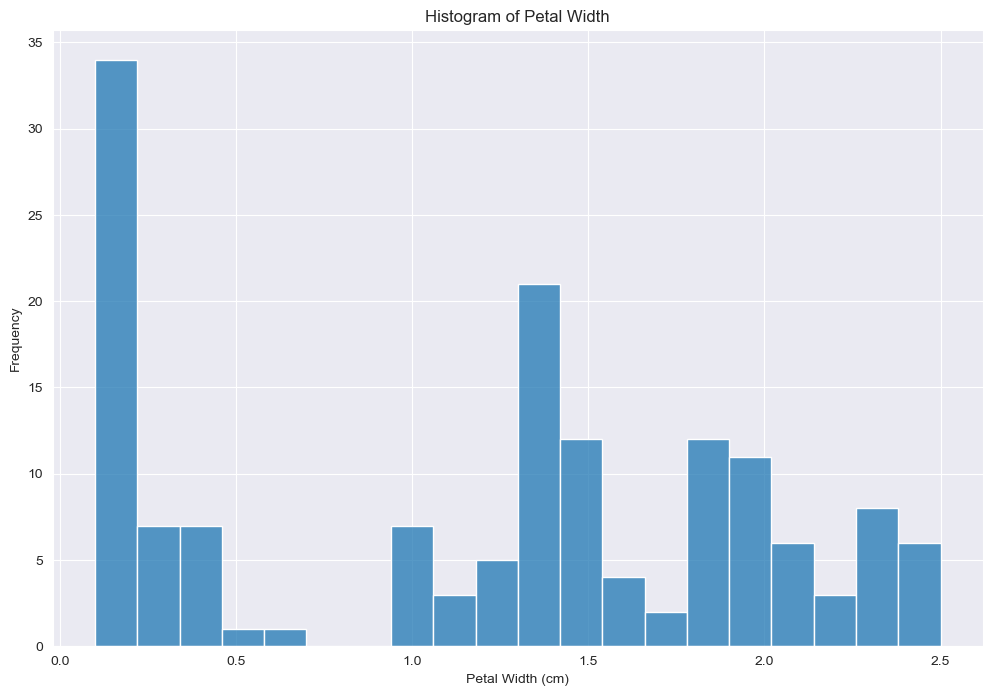

In [15]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
sns.histplot(iris['petal_width'], bins=20)
plt.title(f'Histogram of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.savefig(chart_folder/'petal_width_histogram.png')
plt.show()

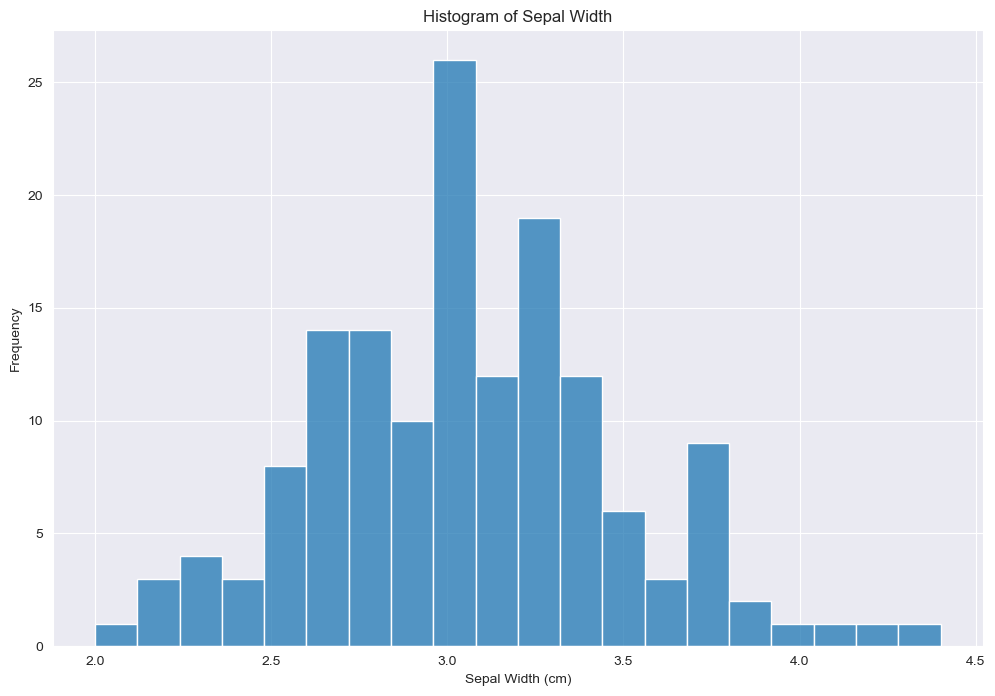

In [16]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
sns.histplot(iris['sepal_width'], bins=20)
plt.title(f'Histogram of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.savefig(chart_folder/'sepal_width_histogram.png')
plt.show()

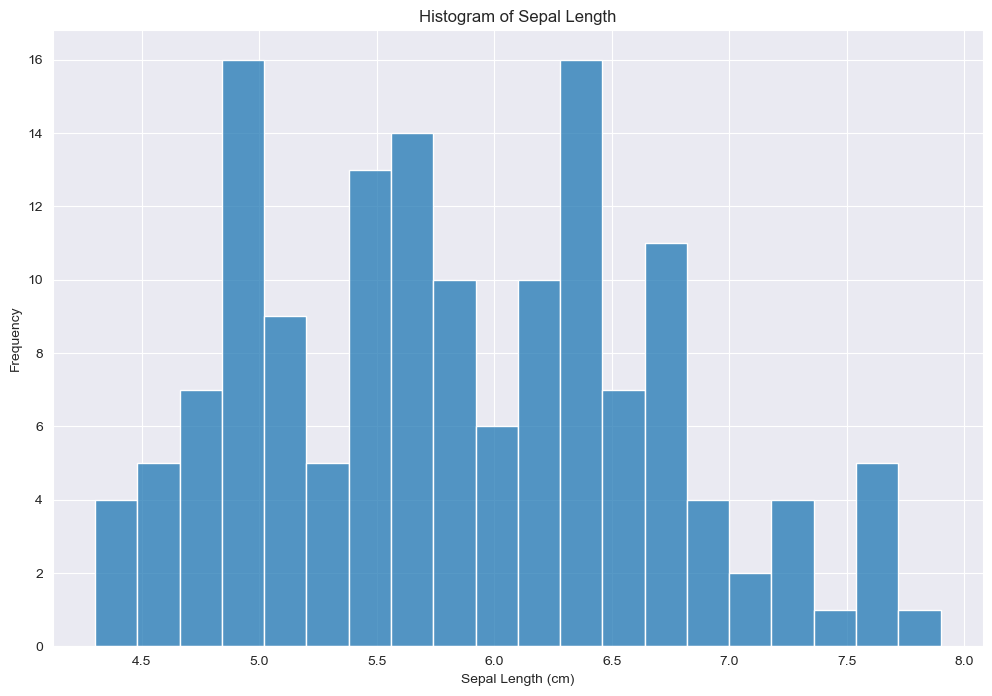

In [17]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
sns.histplot(iris['sepal_length'], bins=20)
plt.title(f'Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.savefig(chart_folder/'sepal_length_histogram.png')
plt.show()

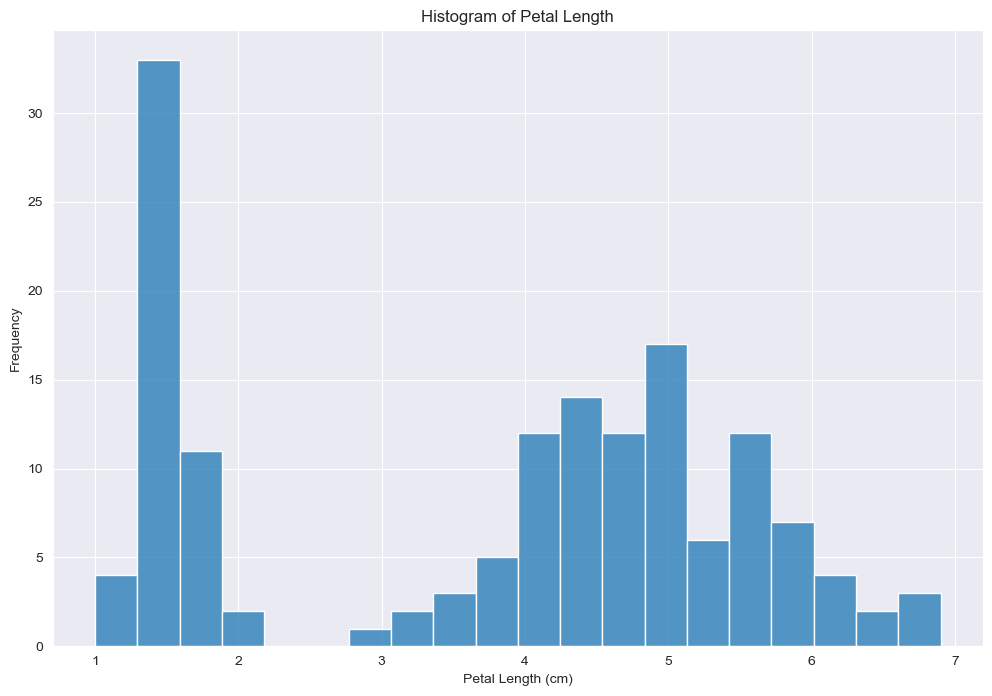

In [18]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(12,8))
sns.histplot(iris['petal_length'], bins=20)
plt.title(f'Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.savefig(chart_folder/'petal_length_histogram.png')
plt.show()

/Users/colleenking/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

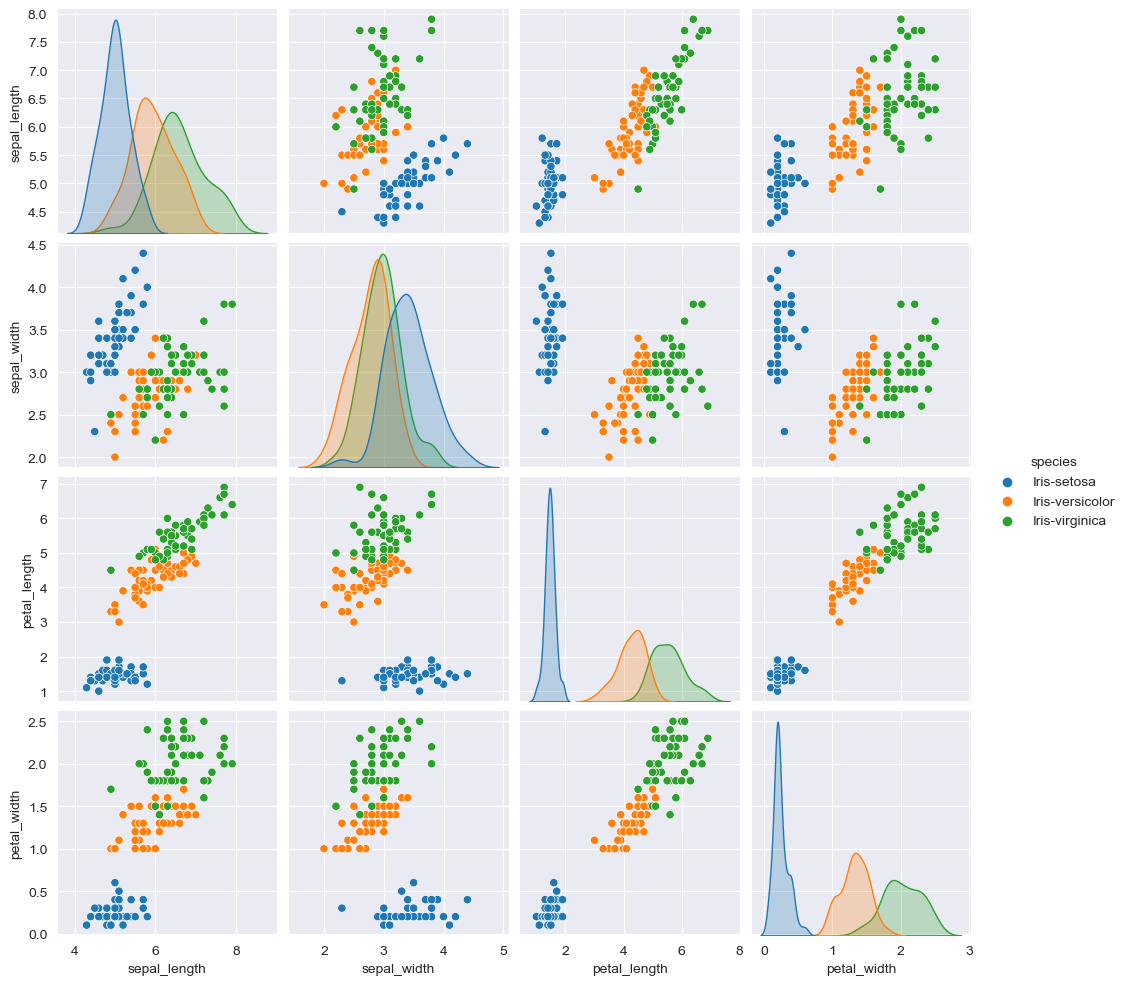

In [26]:
plt.figure(figsize=(12,8))
sns.pairplot(iris, hue='species')
plt.savefig(chart_folder/'paired_scatterplot.png')
plt.show()

In [23]:
import itertools
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for (name1, col1), (name2, col2) in itertools.combinations([*zip(names, columns)], 2):
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=iris, x=col1, y=col2, hue='species')
    plt.title(f'Scatterplot of {name1} vs {name2}')
    plt.xlabel(f'{name1} (cm)')
    plt.ylabel(f'{name2} (cm)')
    plt.savefig(chart_folder/f'{col1}_vs_{col2}.png')
    plt.close()